In [1]:
import numpy as nu
import matplotlib.pyplot as plt
from galpy.potential import SCFPotential, HernquistPotential,NFWPotential, compute_coeffs_spherical,compute_coeffs_axi
from galpy.potential import LogarithmicHaloPotential,FlattenedPowerPotential
from IPython.display import display, Math, Latex
from galpy.util.bovy_coords import cyl_to_spher, spher_to_cyl
%matplotlib inline  


#SCFPotential

## Examples

### Spherical density 

Consider $\rho (r) = \frac{1}{2\pi} \frac{1}{r (1 + r)^3}$

We get $A_{nlm} = \delta_{n0}\delta_{l0}\delta_{m0}$

In [2]:
def rho_Spherical(R, z=0, phi=0., a=1.):
    r, theta, phi = cyl_to_spher(R,z, phi)
    return (2*nu.pi)**-1 * nu.power((r/a)*(a + r)**3 ,-1)

In [3]:
Acos, Asin = compute_coeffs_spherical(rho_Spherical,2)

Creating the SCFPotential object

In [4]:
scf = SCFPotential(1., Acos, Asin, 2.)

In [5]:
def calculateSCFDensity(scf, R, Z=0., phi=0.):
    density = nu.zeros(len(R), float)
    if type(Z) == float: Z = nu.ones((len(R)), float)*Z
    for i in range(len(R)):
        density[i] = scf.dens(R[i],Z[i])
    return density

In [6]:
R = nu.linspace(0.001, .1, 1000)
density = calculateSCFDensity(scf, R)
densityAnalytic = rho_Spherical(R, a=2.)

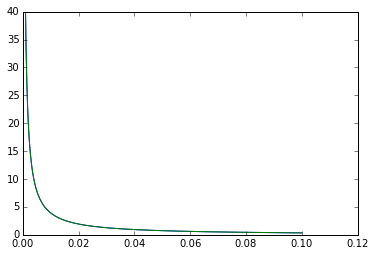

In [7]:
plt.plot(R, density)
plt.plot(R, densityAnalytic)

We confirm that our numerical density matches with our analytic density

#### Comparing to Hernquist potential

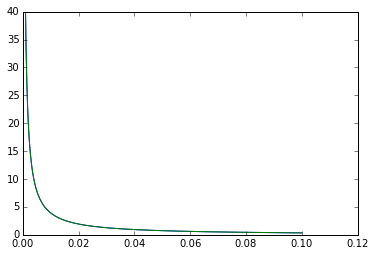

In [8]:
h = HernquistPotential(2., 2.) ## Equation (2.1) and the implemented Hernquist amplitude has a factor 2 difference
z = nu.zeros(len(R))
hDensity = h.dens(R,z)
plt.plot(R, density)
plt.plot(R, hDensity)

Confirmed that the implemented SCF potential matches with the already implemented Hernquist potential.

The only note is amp=2. 

### Zeeuw's perfect ellipsoid

Consider $\rho (r) = \frac{3}{4\pi} \frac{1}{(1 + r)^4}$

We get $A_{nlm} = \frac{3}{4}\delta_{n0}\delta_{l0}\delta_{m0} + \frac{1}{12}\delta_{n1}\delta_{l0}\delta_{m0}$

In [9]:
def rho_Zeeuw(R, z=0., phi=0.):
    r, theta, phi = cyl_to_spher(R,z, phi)
    return 3./(4*nu.pi) * nu.power((1 + r),-4.)

In [10]:
Acos, Asin = compute_coeffs_spherical(rho_Zeeuw, 2) 
scf = SCFPotential(1., Acos, Asin, 1)

In [11]:
density = calculateSCFDensity(scf, R)
densityAnalytic = rho_Zeeuw(R)


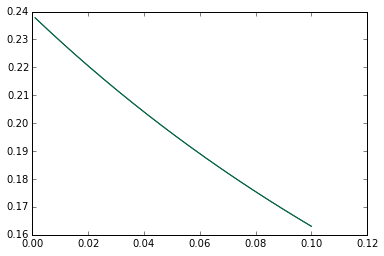

In [12]:
plt.plot(R, density)
plt.plot(R, densityAnalytic)

### NFW potential

Consider $\rho (r) = \frac{1}{4\pi} \frac{1}{r (1 + r)^2}$

In [13]:
def rho_NFW(R, z=0, phi=0., a=1.):
    r, theta, phi = cyl_to_spher(R,z, phi)
    return (4*nu.pi*a**3)**-1. * ((r/a)*(1. + r/a)**2)**-1.

In [14]:
a = .01
Acos, Asin = compute_coeffs_spherical(rho_NFW,1)
scf = SCFPotential(1., Acos, Asin, a)

In [15]:
density = calculateSCFDensity(scf,R)

In [16]:
nfw = NFWPotential(1., a=a)
nfwDensity = nfw.dens(R,z)

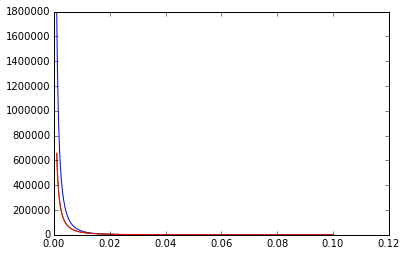

In [17]:
plt.plot(R, density)
plt.plot(R, nfwDensity)
plt.plot(R, rho_NFW(R, a=a))

As we can see, the function does not match well enough. Let's try increasing the size of the coefficients 

In [18]:
Acos, Asin = compute_coeffs_spherical(rho_NFW,4)
scf = SCFPotential(1., Acos, Asin,a)
density = calculateSCFDensity(scf, R)

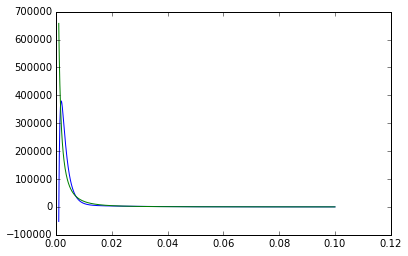

In [19]:
plt.plot(R, density)
plt.plot(R, nfwDensity)

It got worse. Let's try increasing it again...

In [20]:
Acos, Asin = compute_coeffs_spherical(rho_NFW,10)
scf = SCFPotential(1., Acos, Asin,a)
density = calculateSCFDensity(scf,R)

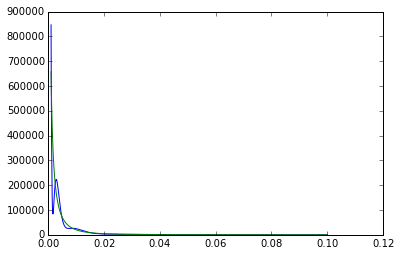

In [21]:
plt.plot(R, density)
plt.plot(R, nfwDensity)

Slightly better. Let's try one more time..

In [22]:
Acos, Asin = compute_coeffs_spherical(rho_NFW,100)
scf = SCFPotential(1., Acos, Asin,a)
density = calculateSCFDensity(scf,R)

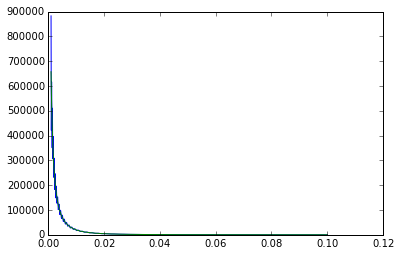

In [23]:
plt.plot(R, density)
plt.plot(R, nfwDensity)

### Axisymmetric density

We'll check if compute_coeffs_axi reduces to compute_coeffs_spherical for a spherical function, as we expect it to.

First, some useful functions that is unique to spherical densities

In [24]:
epi = 1e-14
def test_Acosn(As, Aa):
    return nu.all(nu.fabs(As[0] - Aa[0][:,:1,:1]) < epi)
def test_Acos_nbiggerthan0(Aa):
    return nu.all(nu.fabs(Aa[0][:,1:,1:]) <epi)
def test_Asin_allZero(As, Aa):
    return nu.all(nu.fabs(As[1]) < epi) and nu.all(nu.fabs(Aa[1]) < epi)

def test_all(As,Aa):
    return test_Acosn(As,Aa) and test_Acos_nbiggerthan0(Aa) and test_Asin_allZero(As,Aa)


rho_Spherical

In [25]:
Aspherical = compute_coeffs_spherical(rho_Spherical,10)
Aaxi = compute_coeffs_axi(rho_Spherical, 10, 10)
print test_all(Aspherical,Aaxi)

True


Zeeuw's perfect ellipsoid

In [26]:
Aspherical = compute_coeffs_spherical(rho_Zeeuw,10)
Aaxi = compute_coeffs_axi(rho_Zeeuw, 10, 10)
print test_all(Aspherical,Aaxi)

True


NFW

In [27]:
Aspherical = compute_coeffs_spherical(rho_NFW,10)
Aaxi = compute_coeffs_axi(rho_NFW, 10, 10)

Flattened Power Potential

In [28]:
fp = FlattenedPowerPotential()

In [32]:
A = compute_coeffs_axi(fp.dens, 10,10)
scf = SCFPotential(1., A[0], A[1])

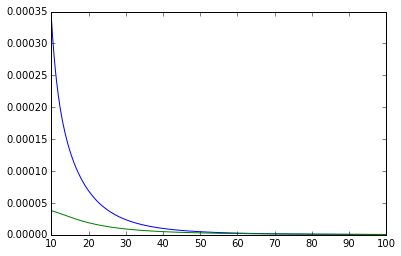

In [33]:
R = nu.linspace(10.,100,1000)
plt.plot(R, calculateSCFDensity(scf, R,0.))
plt.plot(R, fp.dens(R, 10.))

Unfortunatly, compute_coeffs_axi took a longer time for Flattened Power Potential

8.31367023848


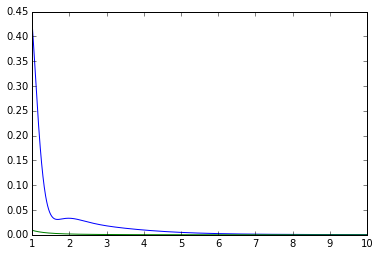

In [34]:
R = nu.ones((1000), float)*0
Z = nu.linspace(1.,10, 1000)
plt.plot(Z, calculateSCFDensity(scf, R, Z))
plt.plot(Z, fp.dens(R,Z))
print nu.std(calculateSCFDensity(scf,R, Z)/fp.dens(R,Z))

It looks like there might be an issue with my code :(